## Занятие 6
## Математический анализ
## Дифференцирование

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

In [ ]:
from sympy.abc import x
def f(x):
    return x**2 * sympy.E**(-x)

Найдем область определения:

In [ ]:
D = continuous_domain(f(x), x, S.Reals)
D

Reals

Проверим на четность:

In [ ]:
if f(-x) == f(x):
     print('Четная функция')
elif f(-x) == -f(x):
     print('Нечетная функция')
else:
     print('Функция общего вида')

Функция общего вида


Функция не периодична

Точки пересечения с OX:

In [ ]:
OXroots = list(solveset(f(x), domain=S.Reals))
OXroots.sort()
OX_y = [f(root) for root in OXroots]
OXroots

[0]

Найдем точки экстремумов:

In [ ]:
df = f(x).diff(x)
df_roots = solve(df, x)
display(df_roots)
df_y = [f(root) for root in df_roots]

[0, 2]

Найдем точки перегиба:

In [ ]:
df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
display(df2_roots)
df2_y = [f(root) for root in df2_roots]

[2 - sqrt(2), sqrt(2) + 2]

Найдем наклонные асимптоты.

In [ ]:
kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
kpos, kneg

(0, -oo)

То есть левой асимптоты нет.

In [ ]:
bpos = sympy.limit(f(x) - kpos * x, x, +sympy.oo)
bpos

0

Построим график:

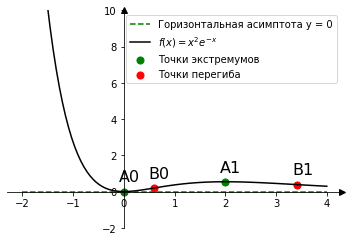

In [ ]:
minY = -2
maxY = 10
ax = plt.gca()
ax.set_ylim(minY, maxY)
X = np.linspace(-2, 4, 100)
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
roots = []
ax.plot(X_D, [0 for x in X_D], 'g--', label='Горизонтальная асимптота y = 0')
ax.plot(X_D, Y_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
roots.extend([df_root for df_root in df_roots])
annotations = ['A{0}'.format(i) for i, df_root in enumerate(df_roots)]
roots.extend([df2_root for df2_root in df2_roots])
annotations += ['B{0}'.format(i) for i, df2_root in enumerate(df2_roots)]
points_y = [float(f(point)) for point in roots]
ax.scatter(df_roots, df_y, 50, color='green', label='Точки экстремумов')
ax.scatter(df2_roots, df2_y, 50, color='red', label='Точки перегиба')
for i, x0 in enumerate(roots):
     ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data',
     xytext=(-5, 10), textcoords='offset points', fontsize=16)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='upper right')

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

In [ ]:
def f(x):
    return x * sympy.E ** (2 / x) + 1

Найдем область определения:

In [ ]:
D = continuous_domain(f(x), x, S.Reals)
D

Union(Interval.open(-oo, 0), Interval.open(0, oo))

Проверим на четность:

In [ ]:
if f(-x) == f(x):
     print('Четная функция')
elif f(-x) == -f(x):
     print('Нечетная функция')
else:
     print('Функция общего вида')

Функция общего вида


Функция не периодична

Точки пересечения с OX:

In [ ]:
OXroots = solveset(f(x), domain=S.Reals)

Найдем точки экстремумов:

In [ ]:
df = f(x).diff(x)
df_roots = solve(df, x)
display(df_roots)
df_y = [f(root) for root in df_roots]

[2]

Найдем точки перегиба:

In [ ]:
df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
display(df2_roots)
df2_y = [f(root) for root in df2_roots]

[]

Найдем наклонные асимптоты.

In [ ]:
kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
kpos, kneg
k = kpos

In [ ]:
bpos = sympy.limit(f(x) - kpos * x, x, +sympy.oo)
bneg = sympy.limit(f(x) - kneg * x, x, -sympy.oo)
bpos, bneg
b = bpos

Найдем вертикальную асимптоту:

In [ ]:
print(f(x).limit(x, 0, dir='-'), f(x).limit(x, 0))

1 oo


Построим график:

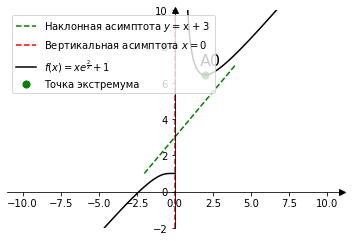

In [ ]:
from sympy import Union


minY = -2
maxY = 10
ax = plt.gca()
ax.set_ylim(minY, maxY)
X = np.linspace(-10, 10, 100)
X1 = np.linspace(-10, float(0 - 0.01), 100) 
X2 = np.linspace(float(0 + 0.01),10, 100)
X1_D = [x for x in X1 if x in D]
X2_D = [x for x in X2 if x in D]
Y1_D = [f(x) for x in X1 if x in D]
Y2_D = [f(x) for x in X2 if x in D]
roots = []
ax.plot(X_D, [k * x + b for x in X_D], 'g--', label=r'Наклонная асимптота $y = $x + {0}'.format(b))
v_as = 0
ax.axvline(x=v_as, color='red', linestyle='--',
 label=r'Вертикальная асимптота $x=' + latex(v_as) + r'$') # График вертикальной асимптоты
ax.plot(X1_D, Y1_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
ax.plot(X2_D, Y2_D, 'k-')
roots.extend([df_root for df_root in df_roots])
annotations = ['A{0}'.format(i) for i, df_root in enumerate(df_roots)]
points_y = [float(f(point)) for point in roots]
ax.scatter(df_roots, df_y, 50, color='green', label='Точка экстремума')
for i, x0 in enumerate(roots):
     ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data',
     xytext=(-5, 10), textcoords='offset points', fontsize=16)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='upper left')

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 

$f(x) = \left(6 x + 3\right) e^{\frac{2}{x}} + 1$

In [ ]:
def f(x):
    return (6 * x + 3) * sympy.E ** (2 / x) + 1

Найдем область определения:

In [ ]:
D = continuous_domain(f(x), x, S.Reals)
D

Union(Interval.open(-oo, 0), Interval.open(0, oo))

Проверим на четность:

In [ ]:
if f(-x) == f(x):
     print('Четная функция')
elif f(-x) == -f(x):
     print('Нечетная функция')
else:
     print('Функция общего вида')

Функция общего вида


Функция не периодична

Точки пересечения с OX:

In [ ]:
OXroots = solveset(f(x), domain=D)

Найдем точки экстремумов:

In [ ]:
df = f(x).diff(x)
df_roots = solve(df, x)
display(df_roots)
df_y = [f(root) for root in df_roots]

[1 - sqrt(2), 1 + sqrt(2)]

Найдем точки перегиба:

In [ ]:
df2 = f(x).diff(x, 2)
df2_roots = solve(df2, x)
display(df2_roots)
df2_y = [f(root) for root in df2_roots]

[-1/3]

Найдем наклонные асимптоты.

In [ ]:
kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
k = kpos
kpos, kneg

(6, 6)

In [ ]:
bpos = sympy.limit(f(x) - kpos * x, x, +sympy.oo)
bneg = sympy.limit(f(x) - kneg * x, x, -sympy.oo)
b = bpos
bpos, bneg

(16, 16)

Найдем вертикальную асимптоту:

In [ ]:
print(f(x).limit(x, 0, dir='-'), f(x).limit(x, 0))

1 oo


Построим график:

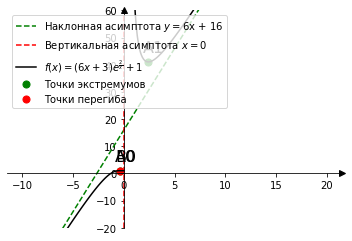

In [ ]:
from sympy import Union


minY = -20
maxY = 60
ax = plt.gca()
ax.set_ylim(minY, maxY)
X = np.linspace(-10, 20, 100)
X1 = np.linspace(-10, float(0 - 0.01), 100) 
X2 = np.linspace(float(0 + 0.01), 10, 100)
X_D = [x for x in X if x in D]
X1_D = [x for x in X1 if x in D]
X2_D = [x for x in X2 if x in D]
Y1_D = [f(x) for x in X1 if x in D]
Y2_D = [f(x) for x in X2 if x in D]
roots = []
ax.plot(X_D, [k * x + b for x in X_D], 'g--', label=r'Наклонная асимптота $y = {0} $x + {1}'.format(k, b))
v_as = 0
ax.axvline(x=v_as, color='red', linestyle='--',
 label=r'Вертикальная асимптота $x=' + latex(v_as) + r'$') # График вертикальной асимптоты
ax.plot(X1_D, Y1_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
ax.plot(X2_D, Y2_D, 'k-')
roots.extend([df_root for df_root in df_roots])
annotations = ['A{0}'.format(i) for i, df_root in enumerate(df_roots)]
points_y = [float(f(point)) for point in roots]
roots.extend([df2_root for df2_root in df2_roots])
annotations += ['B{0}'.format(i) for i, df2_root in enumerate(df2_roots)]
points_y = [float(f(point)) for point in roots]
ax.scatter(df_roots, df_y, 50, color='green', label='Точки экстремумов')
ax.scatter(df2_roots, df2_y, 50, color='red', label='Точки перегиба')
for i, x0 in enumerate(roots):
     ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data',
     xytext=(-5, 10), textcoords='offset points', fontsize=16)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='upper left')